## Análise Exploratória de Dados - Qualidade de Vinhos

# 0 - Introdução

Análise realizada sobre um conjunto de [dados](https://archive.ics.uci.edu/ml/datasets/wine+quality) referentes a qualidade de vinhos, contemplando dois tipos de vinho, o branco e o tinto, do vinho "Verde" do norte de Portugal.

Referências:
- [EDA - Exploratory Data Analysis: Using Python Functions](https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python)
- [Análise Exploratória de Dados](https://www.youtube.com/watch?v=dbr5XHayVdE)
- [Exploratory Data Analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)

# 1 - Descrição dos Dados

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Averiguação do conteúdo do arquivo csv de vinho tinto
!head -n 5 data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6


In [3]:
# Averiguação do conteúdo do arquivo csv de vinho branco
!head -n 5 data/winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6


## 1.1 - Observações Iniciais

- Os dois conjuntos de dados estão no formato .csv
- O separador dos valores é ";"
- Há a presença do cabeçalho para as colunas

In [4]:
# Leitura do conjunto de dados de vinhos tinto
df_tinto = pd.read_csv("data/winequality-red.csv", sep=";")

# Leitura do conjunto de dados de vinhos branco
df_branco = pd.read_csv("data/winequality-white.csv", sep=";")

In [5]:
df_tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_branco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1.2 - Tipo de Dados

O conjunto de dados conta com 12 atributos (colunas) das duas variantes do vinho "Verde". Os atibutos são:

- fixed acidity (acidez fixada)
- volatile acidity (acidez volátil)
- citric acid (ácido cítrico)
- residual sugar (açúcar residual)
- chlorides (cloretos)
- free sulfur dioxide (dióxido de enxofre livre)
- total sulfur dioxide (dióxido de enxofre total)
- density (densidade)
- pH
- sulphates (sulfatos)
- alcohol (alcool)
- quality, with score between 0 and 10 (qualidade de 0 a 10)

In [7]:
# Informação geral do conjunto de dados de vinhos tinto
df_tinto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Informação geral do conjunto de dados de vinhos branco
df_branco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
# Quantidade de valores nulos para o conjunto de vinho tinto
df_tinto.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Quantidade de valores nulos para o conjunto de vinho branco
df_branco.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Adicionalmente, é possível notar que não há valores nulos nos dois conjuntos de dados e que, o conjunto de dados de vinho tinto possui 1599 instâncias enquanto o de vinho branco posui 4898 instancias. Além disso, os dados são do tipo float, com excessão da qualidade, que é de tipo inteiro.

# 2 - Perguntas de Partida e Hipóteses

Para ambos conjuntos podemos fazer as seguintes perguntas:

- Qual maior valor de qualidade observado?
- Quantas instâncias atingiram o valor máximo de qualidade observado?
- Dentre os valores de qualidade obrservados, qual possui maior número de instâncias?
- Existe algum valor discrepante presente?

# 3 - Insights

## 3.1 - Vinho Tinto

In [11]:
# Descrição do conjunto de vinho tinto
df_tinto.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Identificação dos valores de qualidade obtidos
df_tinto.quality.unique()

array([5, 6, 7, 4, 8, 3])

Pode ser observado que não há vinho tinto que possua qualidade com valor 1, 2, 9 ou 10. 

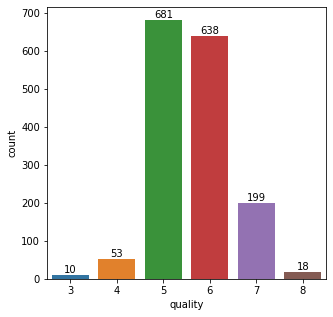

In [19]:
# Contagem dos valores únicos de qualidade para vinho tinto
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='quality', data=df_tinto)

# Identificadores para as barras (com seus valores)
ax.bar_label(
    ax.containers[0],
    fmt='%d',
    label_type='edge',
    color='black'
)

plt.show()

É possível observar que a grande maioria obteve qualidade entre 5 e 6. Apenas 18 instâncias obtveram o valor máximo, com qualidade 8.

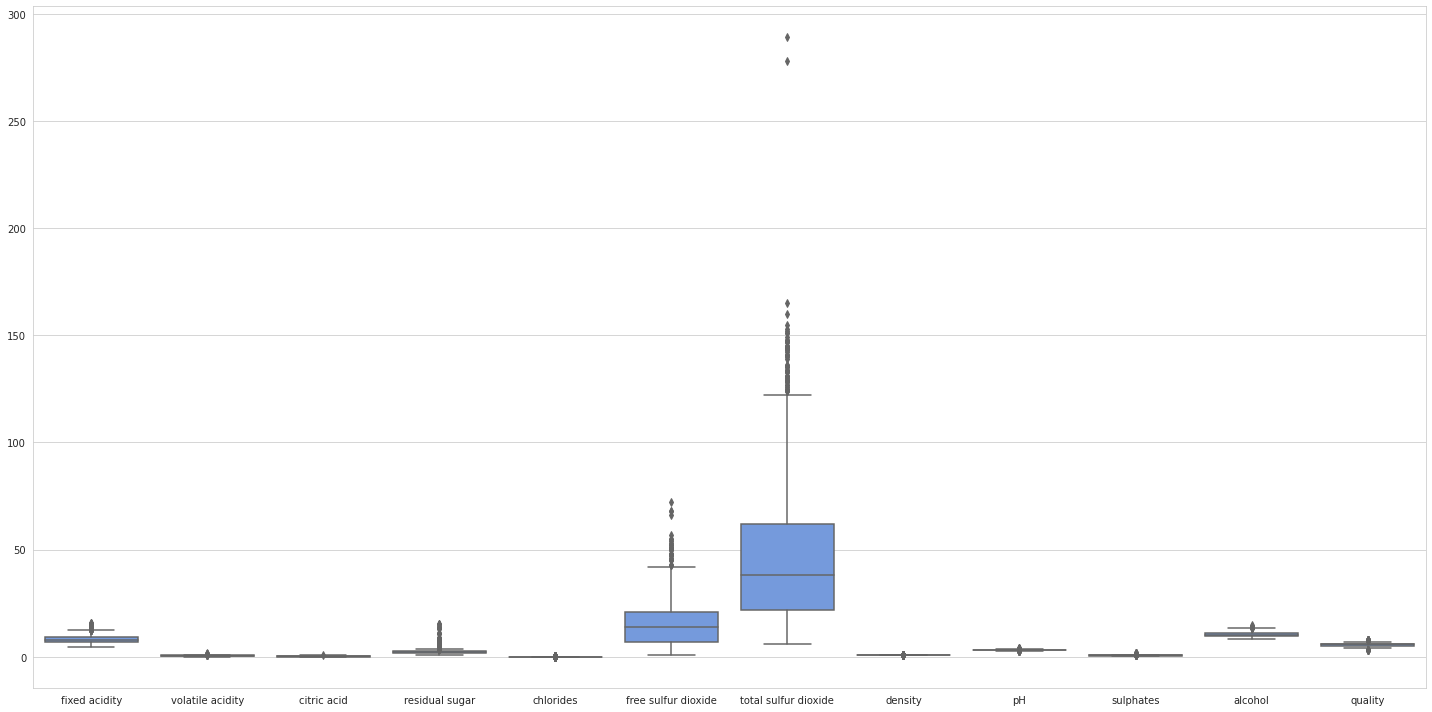

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_tinto, color='cornflowerblue')
plt.tight_layout()

plt.show()

Todos as instâncias possuem valores discrepantes

## 3.2 - Vinho Branco

In [14]:
# Descrição do conjunto de vinho branco
df_branco.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [63]:
# Identificação dos valores de qualidade obtidos
df_branco.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

Pode ser observado que não há vinho branco que possua qualidade com valor 1, 2, ou 10. 

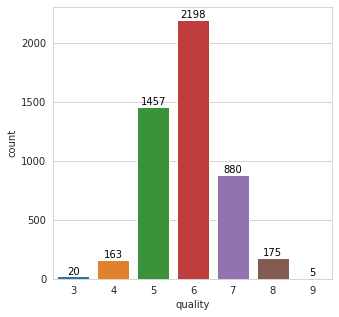

In [66]:
# Contagem dos valores únicos de qualidade para vinho branco
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='quality', data=df_branco)

# Identificadores para as barras (com seus valores)
ax.bar_label(
    ax.containers[0],
    fmt='%d',
    label_type='edge',
    color='black'
)

plt.show()

É possível observar que a grande maioria obteve qualidade 6. Apenas 9 instâncias obtveram o valor máximo, com qualidade 9.

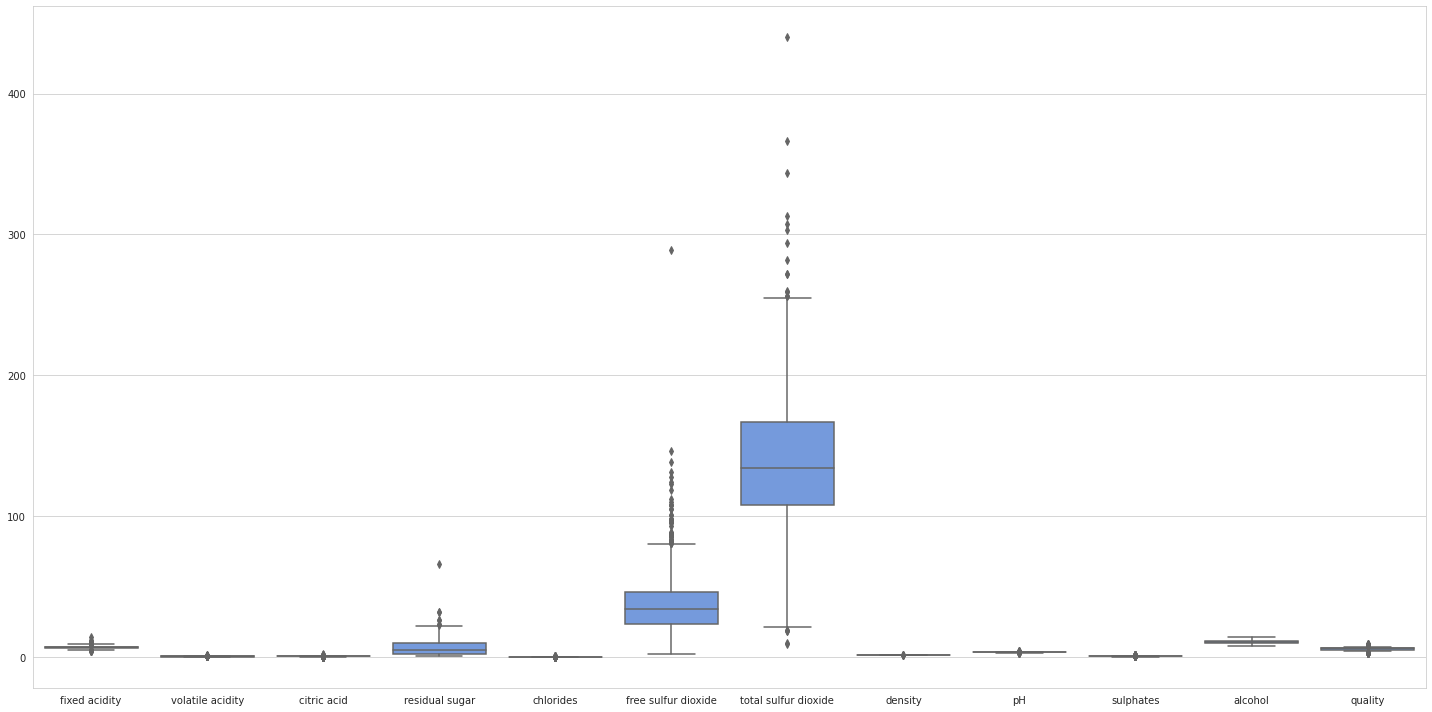

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_branco, color='cornflowerblue')
plt.tight_layout()

plt.show()

Apenas o álcool não possui valores discrepantes